In [4]:
import pandas as pd

from agage_archive import Paths
from agage_archive.io import combine_datasets, read_agage, read_ale_gage, output_dataset

path = Paths()

In [8]:
instrument = "GCECD"

with open(path.root / "data/data_selection/data_release_schedule.xlsx", "+rb") as f:
    df_all = pd.read_excel(f, sheet_name=instrument)

    # Get index of row that contains "General release date"
    idx = df_all[df_all.iloc[:, 0] == "General release date"].index[0]
    general_end_date = df_all.iloc[idx, 1]

    df = pd.read_excel(f, sheet_name=instrument, skiprows=idx+2)

# Remove whitespace
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

# If NaN in df, replace with general end date
df = df.fillna(general_end_date)

df.set_index("Species", inplace=True)

In [9]:
# Process for all species and sites
for species in df.index:
    for site in df.columns:
        if df.loc[species, site] != "x":
            ds = read_agage(species, site, instrument)
            output_dataset(ds, "AGAGE", instrument=instrument, end_date=df.loc[species, site])

In [10]:
ds = read_ale_gage("CH4", "CGO", "GAGE")

In [12]:
ds.time[-1]

<xarray.DataArray 'time' ()>
array('1994-12-29T21:41:00.000000000', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 1994-12-29T21:41:00
Attributes:
    long_name:      time
    units:          seconds since 1970-01-01 00:00:00
    calendar:       proleptic_gregorian
    standard_name:  time
    comment:        Centre point of sampling period

In [13]:
ds_gcmd = read_agage("CH4", "CGO", "GCMD")

In [15]:
ds_picarro = read_agage("CH4", "CGO", "Picarro")

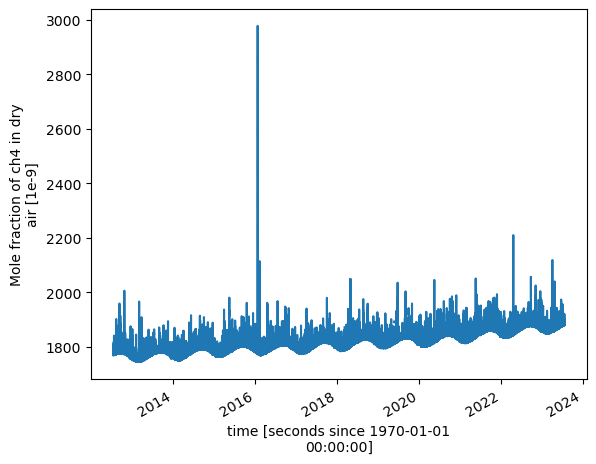

In [18]:
ds_picarro.mf.plot()

In [61]:
ds = combine_datasets("CH3CCl3", "CGO")

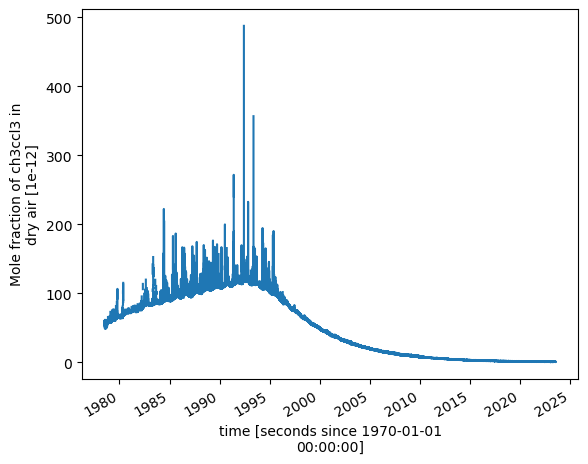

In [63]:
ds.mf.plot()